In [18]:
# ignoreing warnings
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10

from keras.utils import to_categorical
#Squential() model used
from keras.models import Sequential
# Dense , Conv2D, MaxPooling2D used to tell model eithe rfull connected or partial
from keras.layers import Dense, Conv2D, MaxPooling2D
# Dropout for some data for test, Flattern for arranging in a single vector 
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras import layers, models
# Adams is optimizer
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

In [19]:
# loading dataset     
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [20]:
# normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# first training image look like 
X_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
# encoding the categories so that model can diffrentiate between different images
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [23]:
# Data Augmentation(increasing the size and diversity of training data by applying transformations)
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [24]:
datagen.fit(X_train)

In [25]:
# Building model

model = models.Sequential()

In [34]:
# model 
model

<Sequential name=sequential, built=True>

In [26]:
# Convolutional  Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

In [27]:
# Convolution Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


In [28]:
# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

In [29]:
# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile Model
# adding learning rate to optimize model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
#  Train Model (5 epochs)
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 102ms/step - accuracy: 0.5456 - loss: 1.2803 - val_accuracy: 0.6326 - val_loss: 1.0471
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.5511 - loss: 1.2597 - val_accuracy: 0.6423 - val_loss: 1.0191
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5588 - loss: 1.2464 - val_accuracy: 0.6439 - val_loss: 1.0128
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5608 - loss: 1.2403 - val_accuracy: 0.6551 - val_loss: 0.9948
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 73ms/step - accuracy: 0.5665 - loss: 1.2290 - val_accuracy: 0.6475 - val_loss: 1.0110


we have reduce the loss via using learning rate =0.0005

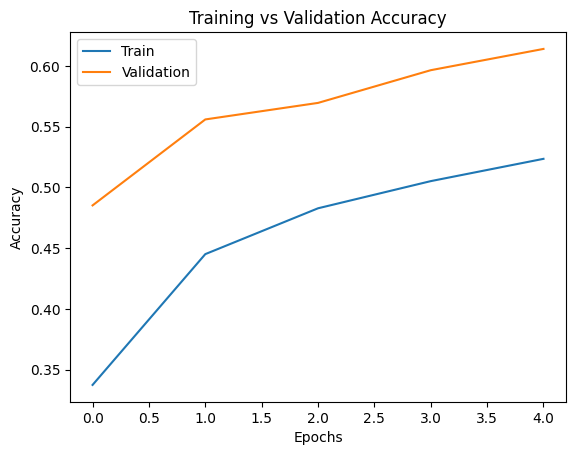

In [32]:
#  Plot Accuracy Curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()